In [ ]:
pip install numpy scipy matplotlib pykalman

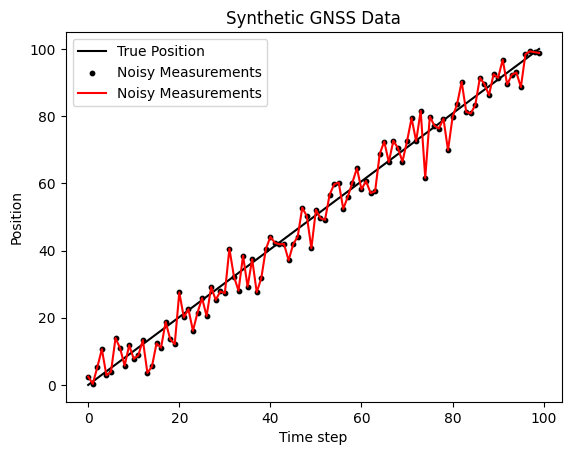

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Define the true path of the receiver (e.g., moving in a straight line)
time_steps = 100
true_position = np.linspace(0, 100, time_steps)
true_velocity = np.ones(time_steps) * 1.0  # Constant velocity

# Simulate noisy GNSS measurements (position with noise)
noise_std = 5.0  # Standard deviation of the noise
noisy_measurements = true_position + np.random.normal(0, noise_std, time_steps)

# Plot the true position and noisy measurements
plt.plot(true_position, label='True Position', color='black')
plt.scatter(range(time_steps), noisy_measurements, color='black', label='Noisy Measurements', s=10)
plt.plot(range(time_steps), noisy_measurements, color='red', label='Noisy Measurements')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.legend()
plt.title('Synthetic GNSS Data')
plt.show()


In [ ]:
from pykalman import KalmanFilter

# Initial state (position and velocity)
initial_state = [0, 1]  # [position, velocity]

# Initial uncertainty (variance)
initial_covariance = np.diag([1, 1])

# Transition matrix (state update model)
transition_matrix = [[1, 1], [0, 1]]

# Observation matrix (how measurements relate to the state)
observation_matrix = [[1, 0]]

# Observation noise covariance (measurement noise)
observation_covariance = np.array([[noise_std**2]])

# Process noise covariance (model uncertainty)
process_covariance = np.diag([1, 0.1])

# Create Kalman Filter object
kf = KalmanFilter(initial_state_mean=initial_state,
                  initial_state_covariance=initial_covariance,
                  transition_matrices=transition_matrix,
                  observation_matrices=observation_matrix,
                  observation_covariance=observation_covariance,
                  transition_covariance=process_covariance)

# Run Kalman Filter on noisy measurements
filtered_state_means, filtered_state_covariances = kf.filter(noisy_measurements)

# Extract the filtered positions
filtered_positions = filtered_state_means[:, 0]


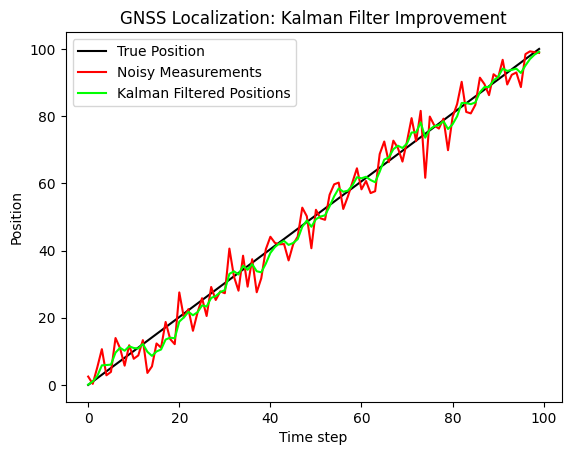

In [42]:
plt.plot(true_position, label='True Position',color='black')
plt.plot(range(time_steps), noisy_measurements, color='red', label='Noisy Measurements')
plt.plot(range(time_steps), filtered_positions, color='lime', label='Kalman Filtered Positions')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.legend()
plt.title('GNSS Localization: Kalman Filter Improvement')
plt.show()


In [ ]:
def calculate_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_noisy = calculate_rmse(noisy_measurements, true_position)
rmse_filtered = calculate_rmse(filtered_positions, true_position)

print(f"RMSE of Noisy Measurements: {rmse_noisy:.2f}")
print(f"RMSE after Kalman Filter: {rmse_filtered:.2f}")


RMSE of Noisy Measurements: 4.55
RMSE after Kalman Filter: 2.22
